In [1]:
#Importing necessary modules
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import os
import math

Here, we will be building dataset for images.

Let's build a dataset for images.

We will use MNIST dataset containing 60000 28x28 grayscale images of clothing.

In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2023-02-16 16:16:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: 'index.csv.2'

     0K .......... .......... .......... .......... ..........  3%  180K 9s
    50K .......... .......... .......... .......... ..........  6%  193K 8s
   100K .......... .......... .......... .......... ..........  9%  195K 8s
   150K .......... .......... .......... .......... .......... 12% 3.51M 6s
   200K .......... .......... .......... .......... .......... 15%  199K 6s
   250K .......... .......... 

Let's create a function to look at data.

In [3]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap = 'gray')
    plt.title('y' +":"+ data_sample[1])

In [4]:
data_name = pd.read_csv('index.csv')

In [5]:
data_name.shape

(60000, 2)

In [6]:
data_name.head(5)

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [7]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


<h2 id="load_image">Load Image</h2>


To load the image, we need the directory and the image name. We can concatenate the variable <code>train_data_dir</code> with the name of the image stored in a Dataframe. Finally, We will store the result in the variable <code>image_name</code>


In [8]:
directory = ""

In [9]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1]

image_path=os.path.join(directory,image_name)

image_path

'img/fashion1.png'

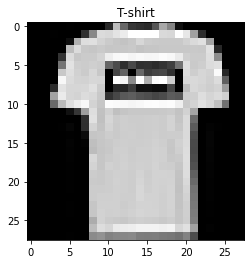

In [10]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

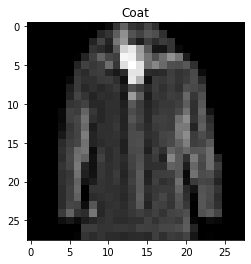

In [11]:
# Plot the 20th image

image_name = data_name.iloc[19, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[19, 0])
plt.show()

Now, Let's create a dataset class and then create an object.

In [12]:
class Dataset(Dataset):
    
    #CONSTRUCTOR
    def __init__(self, csv_file, transform = None):
        
        #Image Directory
        
        self.transform = transform
        self.data_name = pd.read_csv('index.csv')
        
        self.len = self.data_name.shape[0]
        

    #Get the length
    def __len__(self):
        return self.len
    
    #Getitem
    def __getitem__(self, idx):
        
        img_name = self.data_name.iloc[idx, 1]
        
        image = Image.open(img_name)
        

        # The class label for the image
        
        y = self.data_name.iloc[idx, 0]
        plt.imshow(image,cmap='gray', vmin=0, vmax=255)
        
        plt.title(y)
        plt.show()
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return (image, y)

In [13]:
# Create the dataset objects

dataset = Dataset(csv_file='index.csv')

In [14]:
dataset

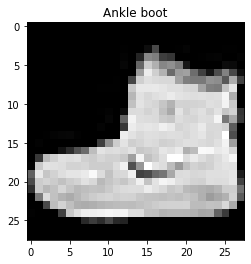

(<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x24811E224F0>,
 'Ankle boot')

In [15]:
dataset[0]

We have created the dataset class and initialized dataset object. Now, let's apply some transforms.

We have already imported <code>transforms</code> from torchvision.

Let's apply multiple transforms.

Let's create a transform using <code>Compose</code>

In [16]:
data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])

In [17]:
dataset_ = Dataset(csv_file = 'index.csv', transform = data_transform)

In [18]:
type(dataset_)

__main__.Dataset

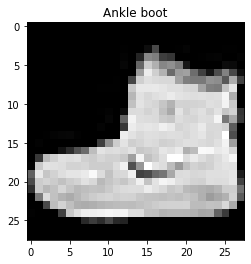

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0118, 0.0000, 0.1412, 0.5333, 0.4980, 0.2431, 0.2118, 0.0000,
           0.0000, 0.0000, 0.0039, 0.0118],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0235, 0.0000, 0.4000, 0.8000, 0.6902, 0.5255, 0.5647, 0.4824,
           0.0902, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.6078, 0.9255, 0.8118, 0.6980, 0.4196, 0.6118,
           0.6314, 0.4275, 0.2510, 0.0902],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
           0.0000, 0.2706, 0.8118, 0.8745, 0.8549, 0.8471, 0.8471, 0.6392,
           0.4980, 0.4745, 0.4784, 0.5725],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0039,
           0.0000, 0.7843, 0.9098, 0.9098, 0.9137, 0.8980, 0.8745, 0.8745,
           0.8431, 0.8353, 0.6431, 0.4980],
          [0.0000, 0.0000, 0.0

In [19]:
dataset_[0]

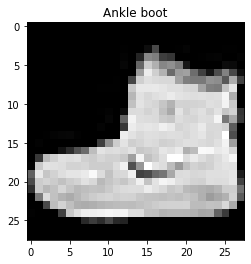

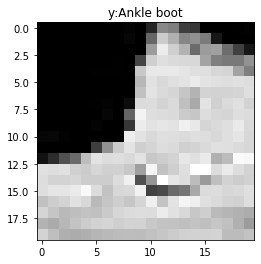

In [20]:
# Plot the first element in the dataset

show_data(dataset_[0],shape = (20, 20))

In the below example, we Vertically flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


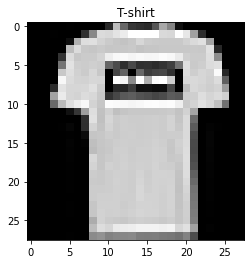

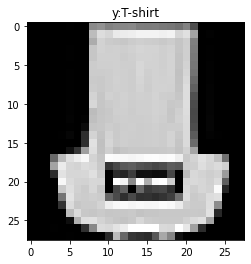

In [21]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file='index.csv' ,transform=fliptensor_data_transform )
show_data(dataset[1])